In [1]:
import os
import numpy as np
import cv2

(128, 128, 3)


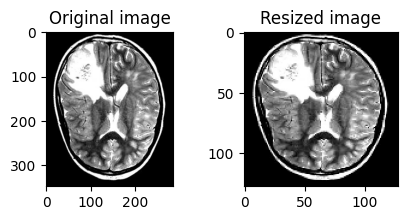

In [2]:
size = 128
import cv2
from cv2 import imread, resize
import matplotlib.pyplot as plt
import tensorflow as tf

file_to_read = 'C:/Users/yashg/Downloads/archive (10)/yes/y0.jpg'
img = imread(file_to_read)
img2 = resize(img,(size,size))
print(img2.shape)

#image_show

plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.title('Original image')
plt.subplot(1,2,2)
plt.imshow(img2[:,:,::-1])
plt.title('Resized image')
plt.show()

def produce_new_img(img2):
    imga = cv2.rotate(img2,cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2,cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2,cv2.ROTATE_180)
    imgd = cv2.flip(img2,0)
    imge = cv2.flip(img2,1)
    return imga,imgb,imgc,imgd,imge

new_img = produce_new_img(img2)

In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import cv2  

# Define the folder paths for melanoma and naevus partitions
folder_path_1 = 'C:/Users/yashg/Downloads/archive (10)/yes'
folder_path_2 = 'C:/Users/yashg/Downloads/archive (10)/no'

# Define the image size
size = 128

# Initialize lists for images and labels
X = []
y = []

def produce_new_img(img2):
    imga = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
    imgb = cv2.rotate(img2, cv2.ROTATE_90_COUNTERCLOCKWISE)
    imgc = cv2.rotate(img2, cv2.ROTATE_180)
    imgd = cv2.flip(img2, 0)
    imge = cv2.flip(img2, 1)
    return imga, imgb, imgc, imgd, imge

def has_three_channels(img):
    return img.shape[-1] == 3

lista1 = os.listdir(folder_path_1)
lista2 = os.listdir(folder_path_2)

# Load images from folder 1 (Yes) and assign label 0
for fname_image in lista1:
    file_to_read = os.path.join(folder_path_1, fname_image)
    img = imread(file_to_read)
    if has_three_channels(img):
        img2 = resize(img, (size, size))
        # Add original and transformed images to X
        X.append(img2)
        new_img = produce_new_img(img2)
        X.extend(new_img)
        # Assign label 0 for Yes
        y.extend([0] * 6)  # 1 original + 5 transformed images

# Load images from folder 2 (No) and assign label 1
for fname_image in lista2:
    file_to_read = os.path.join(folder_path_2, fname_image)
    img = imread(file_to_read)
    if has_three_channels(img):
        img2 = resize(img, (size, size))
        # Add original and transformed images to X
        X.append(img2)
        new_img = produce_new_img(img2)
        X.extend(new_img)
        # Assign label 1 for No
        y.extend([1] * 6)  # 1 original + 5 transformed images

print("Total images loaded:", len(X))


Total images loaded: 17352


In [4]:
from keras.utils import to_categorical

X = np.array(X)
y = np.array(y)

y_train = to_categorical(y, num_classes=2)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.10, random_state=50,stratify=y)

In [5]:
print('Train dataset shape',X_train.shape)
print('Test dataset shape',X_test.shape)

Train dataset shape (15616, 128, 128, 3)
Test dataset shape (1736, 128, 128, 3)


In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam


pre_trained_model = tf.keras.applications.Xception(include_top=False,
                                                 input_shape=(size, size, 3),
                                                 weights='imagenet')


a1 = (tf.keras.layers.Flatten())(pre_trained_model.output)
a2 = (tf.keras.layers.Dense(4096,activation='relu'))(a1)
a3 = (tf.keras.layers.Dropout(0.5))(a2)
a4 = (tf.keras.layers.Dense(4096,activation='relu'))(a3)
a5 = (tf.keras.layers.Dropout(0.5))(a4)

a7 = (tf.keras.layers.Dense(2,activation='softmax'))(a5)


model = tf.keras.models.Model(inputs = pre_trained_model.inputs , outputs = a7)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


lr = 0.0001


batch_size = 8
epochs = 10
optimizer = tf.keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-3)
metrics = [tf.keras.metrics.AUC(),tf.keras.metrics.Precision() , tf.keras.metrics.Recall()]
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)

datagen.fit(X_train)

history=model.fit(datagen.flow(X_train,y_train), epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, y_test))
# getting the best model

Epoch 1/10


C:\Users\yashg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 3005s 6s/step - accuracy: 0.8116 - loss: 0.3761 - val_accuracy: 0.9885 - val_loss: 0.0383
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3030s 6s/step - accuracy: 0.9925 - loss: 0.0263 - val_accuracy: 0.9965 - val_loss: 0.0078
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3044s 6s/step - accuracy: 0.9952 - loss: 0.0118 - val_accuracy: 0.9965 - val_loss: 0.0071
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3076s 6s/step - accuracy: 0.9975 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3084s 6s/step - accuracy: 0.9983 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3091s 6s/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9925 - val_loss: 0.0260
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3084s 6s/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 1.0000 - val_loss: 6.7311e-05
Epoch 8/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 3092s 6s/step - accuracy: 0.9971 - loss: 0.0073 - val_acc

: 

In [7]:
# Calculate total trainable parameters
total_params = model.count_params()
print(f"Total Trainable Parameters: {total_params}")

Total Trainable Parameters: 171872810


In [ ]:
model.save('Xception1_P2_FACE.h5')

In [21]:
y_true = y_test.flatten()
y_true_df = pd.DataFrame(data=y_true, columns=['ground_label'])
y_true_df.to_csv('ground_labels_P2_Face.csv')

In [11]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import preprocess_input

# Load the pre-trained model
model = tf.keras.models.load_model("C:/Users/yashg/Downloads/Brain Tumor  Complete Project/Xception_P2_FACE.h5")

# Function to preprocess input image
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    
    # Resize the image to the required input size
    resized_image = cv2.resize(image, (56, 56))  # Adjust dimensions based on your model's input size
    
    # Preprocess the image
    preprocessed_image = preprocess_input(resized_image)
    
    return preprocessed_image

image_path = "C:/Users/yashg/Downloads/archive (10)/pred/pred30.jpg"

# Preprocess the input image
input_image = preprocess_image(image_path)

# Expand dimensions to match the input shape expected by the model
input_image = np.expand_dims(input_image, axis=0)

# Make predictions
predictions = model.predict(input_image)

# Assuming your model outputs class probabilities and you want the predicted class
# Replace 'np.argmax' with your actual post-processing if needed
predicted_class = np.argmax(predictions, axis=1)

# Now 'predicted_class' contains the predicted class for your input image
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 568ms/step
Predicted Class: [1]
